# Demonstrate Statcasting

A notebook of a few ways to use the Statcast pitching tools.

In [1]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from random import randrange
import scipy.stats as sst

# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import pandas as pd

import glob

In [2]:
# start by selecting your year of interest
year = '2020'

# todo: add cross-year slices

In [3]:
# pull in the codes for statcast queries

PlayerDict = dict()
f = open('data/playerdict'+year+'.txt')

line = f.readline()

line = f.readline()

while line:
    PlayerDict[line.split(',')[0].strip()] = line.split(',')[1].strip()
    line = f.readline()

f.close()
print(PlayerDict['Jose Berrios'])

621244


In [4]:
year = '2020'
plr_files = glob.glob('data/*'+year+'.csv')
saved_plrs = [d.strip('data/').strip('.csv').strip('_'+year) for d in plr_files]

In [5]:
# version where we read in the saved files
BPDict = {}

BPDict[year] = {}

for pindx,pnumber in enumerate(saved_plrs):

    link = plr_files[pindx]
    BPDict[year][pnumber] = pd.read_csv(link, low_memory=False)

In [6]:
year = '2019'
plr_files = glob.glob('data/*'+year+'.csv')
saved_plrs = [d.strip('data/').strip('.csv').strip('_'+year) for d in plr_files]
BPDict[year] = {}

for pindx,pnumber in enumerate(saved_plrs):

    link = plr_files[pindx]
    BPDict[year][pnumber] = pd.read_csv(link, low_memory=False)

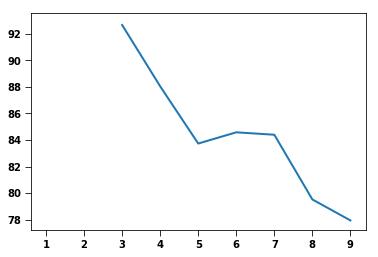

In [7]:
pitches = np.array(['FF', 'FT','SI', 'FC','FS','CH' , 'SL', 'KC','CU',  'EP' ])
totvel = np.zeros(pitches.size)
numvel = np.zeros(pitches.size)

year = '2020'

for indx in range(0,99):
    #print(indx)
    plr = saved_plrs[indx]#check_players[indx]
    data = []
    #for pitch in pitches[(-1.*pitches_sorted).argsort()]:
    for ipitch,pitch in enumerate(pitches):
        speeds = np.array(BPDict[year][plr]['release_speed'])
        ptypes = BPDict[year][plr]['pitch_type']
        agreed = np.where(ptypes == pitch)[0]
        totvel[ipitch] += np.nansum(speeds[agreed])
        numvel[ipitch] += len(agreed)


plt.plot(np.cumsum(np.ones(pitches.size)),totvel/numvel)


In [8]:
#check_players = ['Shane Bieber','Jose Berrios','Zack Greinke','Gerrit Cole','James Paxton']

plr = saved_plrs[indx]#check_players[0] # select Berrios


# here's everything we have access to now!
BPDict[year][plr].keys()

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [9]:
PitchDict = {'CH':0,\
             'CU':1,\
             'EP':2,\
             'FO':3,\
             'FA':4,\
             'KN':5,\
             'KC':6,\
             'SC':7,\
             'SI':8,\
             'SL':9,\
             'FC':10,\
             'FS':11,\
            'FT':12,\
            'FF':13,\
            'PO':14,
            'nan':15,
            'CS':16}


iPitchDict = {0:'CH',\
             1:'CU',\
             2:'EP',\
             3:'FO',\
             4:'FA',\
             5:'KN',\
             6:'KC',\
             7:'SC',\
             8:'SI',\
             9:'SL',\
             10:'FC',\
             11:'FS',\
            12:'FT',\
            13:'FF',\
            14:'PO',\
             15:'nan',\
             16:'CS'}



In [10]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=2)
#pca.fit(X)
#print(pca.components_)
#print(pca.explained_variance_)



In [22]:
year = '2019'

for val in BPDict[year][plr]['pitch_type']:
    if val not in PitchDict.keys(): 
        print(val)
        PitchDict[val] = 15
        
year = '2020'



In [49]:
X = []
ptype = []


year = '2020'
#for plr in check_players:
for plr in saved_plrs:

    Xtmp = np.array([BPDict[year][plr]['release_pos_x'],BPDict[year][plr]['release_pos_z'],\
                 BPDict[year][plr]['plate_x'],BPDict[year][plr]['plate_z'],\
                 BPDict[year][plr]['vx0'],BPDict[year][plr]['vy0'],BPDict[year][plr]['vz0'],\
                 BPDict[year][plr]['ax'],BPDict[year][plr]['ay'],BPDict[year][plr]['az'],\
             BPDict[year][plr]['release_spin_rate']]).T
    
    for val in BPDict[year][plr]['pitch_type']:
        if val not in PitchDict.keys(): 
            print(val)
            PitchDict[val] = 17
            
    ptypetmp = np.array([PitchDict[x] for x in BPDict[year][plr]['pitch_type']])

    try:
        if BPDict[year][plr]['p_throws'][0] == 'L':
            for xx in range(0,Xtmp.shape[0]):
                X.append(Xtmp[xx])
                ptype.append(ptypetmp[xx])
    except:
        pass
        

PT2020 = np.array(ptype)
X2020 = np.array(X)
print(X2020.shape)

(64661, 11)


In [50]:
X = []
ptype = []


year = '2019'
#for plr in check_players:
for plr in saved_plrs:

    Xtmp = np.array([BPDict[year][plr]['release_pos_x'],BPDict[year][plr]['release_pos_z'],\
                 BPDict[year][plr]['plate_x'],BPDict[year][plr]['plate_z'],\
                 BPDict[year][plr]['vx0'],BPDict[year][plr]['vy0'],BPDict[year][plr]['vz0'],\
                 BPDict[year][plr]['ax'],BPDict[year][plr]['ay'],BPDict[year][plr]['az'],\
             BPDict[year][plr]['release_spin_rate']]).T
    
    for val in BPDict[year][plr]['pitch_type']:
        if val not in PitchDict.keys(): 
            print(val)
            PitchDict[val] = 17
            
    ptypetmp = np.array([PitchDict[x] for x in BPDict[year][plr]['pitch_type']])

    try:
        if BPDict[year][plr]['p_throws'][0] == 'L':
            for xx in range(0,Xtmp.shape[0]):
                X.append(Xtmp[xx])
                ptype.append(ptypetmp[xx])
    except:
        pass
        

PT2019 = np.array(ptype)
X2019 = np.array(X)
print(X2019.shape)

(149536, 11)


In [51]:
# actually do the fits!
X2020[~np.isfinite(X2020)] = 0.
X2019[~np.isfinite(X2019)] = 0.



pca = PCA(n_components=4)
pca.fit(X2019)



PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(-500.0, 45, 'Knuckle Curves')

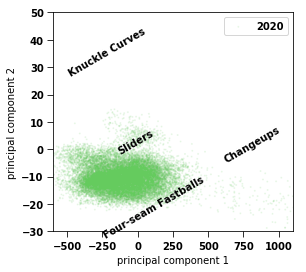

In [52]:




projected = pca.transform(X2020)


#mpl.rcParams['xtick.labelsize'] = 12
#mpl.rcParams['ytick.labelsize'] = 12



fig = plt.figure(figsize=(4.5,4))

ax1 = fig.add_axes([0.13,0.12,0.74,0.76])
#ax4 = fig.add_axes([0.88,0.12,0.015,0.76])

# all 'FF':
w = np.where(PT2020==13)[0]

# all 'SI': (no FT this year!)
#w = np.where(PT==8)[0]

# all 'CH':
#w = np.where(PT==0)[0]

ax1.scatter(projected[w, 0], projected[w, 1],
            color=cm.viridis(PT2020[w]/17.,1.), alpha=0.1,s=1.,marker='o',label='2020')


ax1.legend()
ax1.set_xlabel('principal component 1')
ax1.set_ylabel('principal component 2')
#ax1.set_title('Gerrit Cole: PCA pitch fingerprints')
#ax1.set_title('Zack Greinke: PCA pitch fingerprints')
#ax1.set_title('Mark Melancon: PCA pitch fingerprints')


ax1.axis([-600,1100,-30,50])

#cmapi = mpl.colors.ListedColormap([cm.viridis(x/14) for x in utype])
#bounds = utype
#norm = mpl.colors.BoundaryNorm(np.array(uvals), cmapi.N)
    
#cb1 = mpl.colorbar.ColorbarBase(ax4, cmap=cmapi,norm=norm)
#cb1.set_label('Pitch Type',size=14)
#cb1.set_xlim(1,5)
#cb1.set_ticks([1.5,3,4.5])
#cb1.set_ticklabels(['1','2','4'])
#cb1.ax.minorticks_off()

ax1.text(-250.,-9,'Four-seam Fastballs',ha='left',va='top',rotation=30)
ax1.text(600.,9,'Changeups',ha='left',va='top',rotation=30)
ax1.text(-150.,8,'Sliders',ha='left',va='top',rotation=30)
ax1.text(-500.,45,'Knuckle Curves',ha='left',va='top',rotation=30)




In [53]:
for ipt in range(0,17):
    w = np.where(PT2019==ipt)[0]
    print(ipt,iPitchDict[ipt],w.size)

0 CH 19794
1 CU 13621
2 EP 17
3 FO 0
4 FA 0
5 KN 0
6 KC 2401
7 SC 0
8 SI 16386
9 SL 22918
10 FC 13539
11 FS 88
12 FT 9897
13 FF 49861
14 PO 0
15 nan 0
16 CS 0


In [54]:



xbins = np.linspace(-1200,1200,60)
dx = xbins[1]-xbins[0]
ybins = np.linspace(-50,50,40)
dy = ybins[1]-ybins[0]

xxbins,yybins = np.meshgrid(xbins,ybins)

img = {}



#print(xbin[0:10])

for ipt in [0,1,6,8,9,10,11,13,16]:
    img[ipt] = np.zeros([xbins.size,ybins.size])


    w = np.where(PT2020==ipt)[0]
    
    xbin = np.round((projected[w, 0] - np.nanmin(xbins))/dx).astype('int')
    ybin = np.round((projected[w, 1] - np.nanmin(ybins))/dy).astype('int')

    for xx in range(0,xbins.size):
        for yy in range(0,ybins.size):
            ww = np.where((xbin == xx) & (ybin == yy))[0]
            img[ipt][xx,yy] = ww.size



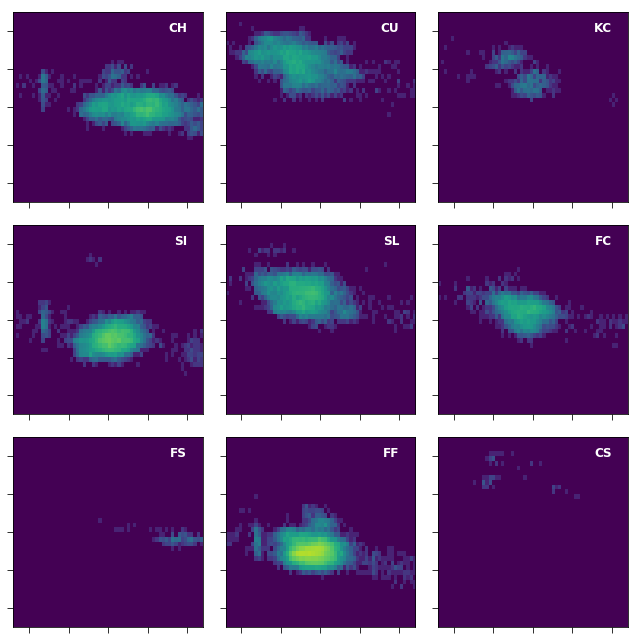

In [55]:

fig = plt.figure(figsize=(9,9))

for ival,ipt in enumerate([0,1,6,8,9,10,11,13,16]):
    ax = fig.add_subplot(3,3,ival+1)
    ax.imshow(np.log10(img[ipt].T+1.),origin='lower',\
           extent=(np.nanmin(xbins),np.nanmax(xbins),np.nanmin(ybins),np.nanmax(ybins)),\
          aspect='auto',cmap=cm.viridis,vmin=0.,vmax=3.)
    ax.text(1000.,40.,iPitchDict[ipt],color='white',size=12,ha='right')
    ax.set_xticklabels(());ax.set_yticklabels(())
    
plt.tight_layout()


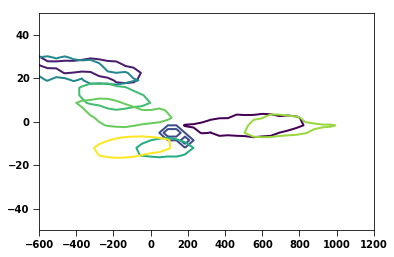

In [20]:
for ipt in [0,1,3,6,8,9,10,11,13]:
    plt.contour(xxbins,yybins,(img[ipt].T+1.),1,colors=cm.viridis(ipt/13.),lw=ipt/4.)#)



In [26]:
print(utype)

dict_keys([0, 10, 8, 9, 13])


In [27]:
np.unique([iPitchDict[u] for u in utype])

array(['CH', 'FC', 'FF', 'SI', 'SL'], dtype='<U2')

In [28]:
plt.scatter(projected[:, 0], projected[:, 1],
            color=cm.viridis(ptypey/14.,1.), facecolor='none', alpha=1.0,s=40.,marker='o',label='Gerrit Cole 2020')

for u in utype:
    print()

TypeError: 'PCA' object is not subscriptable

[ 6 10 11 13]


Text(-500.0, 45, 'Knuckle Curves')

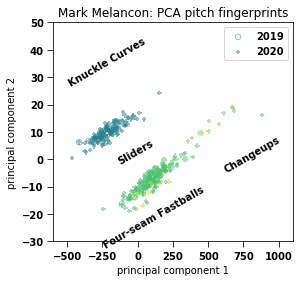

In [31]:
#import matplotlib as mpl

projected = pca.transform(X)


#mpl.rcParams['xtick.labelsize'] = 12
#mpl.rcParams['ytick.labelsize'] = 12



fig = plt.figure(figsize=(4.5,4))

ax1 = fig.add_axes([0.13,0.12,0.74,0.76])
#ax4 = fig.add_axes([0.88,0.12,0.015,0.76])





ax1.scatter(projected[::10, 0], projected[::10, 1],
            color=cm.viridis(ptype[::10]/14.,1.), facecolor='none', alpha=0.5,s=30.,marker='o',label='2019')


projected = pca.transform(Y)
ptypey = np.array([PitchDict[x] for x in BPDict[year][plr]['pitch_type']])



ax1.scatter(projected[:, 0], projected[:, 1],
            color=cm.viridis(ptypey/14.,1.), alpha=0.5,s=20.,marker='+',label='2020')



ax1.legend()
ax1.set_xlabel('principal component 1')
ax1.set_ylabel('principal component 2')
#ax1.set_title('Gerrit Cole: PCA pitch fingerprints')
#ax1.set_title('Zack Greinke: PCA pitch fingerprints')
ax1.set_title('Mark Melancon: PCA pitch fingerprints')


ax1.axis([-600,1100,-30,50])


utype = Counter(ptype).keys()

pvals = [iPitchDict[u] for u in utype]
uvals = [u for u in utype]

print(np.array(uvals))

#cmapi = mpl.colors.ListedColormap([cm.viridis(x/14) for x in utype])
#bounds = utype
#norm = mpl.colors.BoundaryNorm(np.array(uvals), cmapi.N)
    
#cb1 = mpl.colorbar.ColorbarBase(ax4, cmap=cmapi,norm=norm)
#cb1.set_label('Pitch Type',size=14)
#cb1.set_xlim(1,5)
#cb1.set_ticks([1.5,3,4.5])
#cb1.set_ticklabels(['1','2','4'])
#cb1.ax.minorticks_off()

ax1.text(-250.,-9,'Four-seam Fastballs',ha='left',va='top',rotation=30)
ax1.text(600.,9,'Changeups',ha='left',va='top',rotation=30)
ax1.text(-150.,8,'Sliders',ha='left',va='top',rotation=30)
ax1.text(-500.,45,'Knuckle Curves',ha='left',va='top',rotation=30)



#plt.savefig('/Users/mpetersen/Downloads/PCA_greinke.png',dpi=300)


In [14]:
BPDict[year][plr]['description']

0            swinging_strike
1                       ball
2                       foul
3                       foul
4            swinging_strike
5                       ball
6                       foul
7                       ball
8            swinging_strike
9                       ball
10             called_strike
11                      ball
12             hit_into_play
13                      ball
14             called_strike
15                      foul
16           swinging_strike
17                      ball
18                      foul
19           swinging_strike
20           swinging_strike
21           swinging_strike
22           swinging_strike
23                      ball
24           swinging_strike
25                      ball
26              blocked_ball
27                      foul
28             called_strike
29                      ball
                ...         
3332    hit_into_play_no_out
3333           called_strike
3334                foul_tip
3335          

In [8]:
starts = np.unique(BPDict[year][plr]['game_date'])
pitches = np.unique(BPDict[year][plr]['pitch_type'].astype('str'))
print(pitches)
#print(BPDict[plr]['pitch_type'])
pitches = pitches[pitches!='nan']
print(pitches)


['CH' 'FC' 'FF' 'KC' 'nan']
['CH' 'FC' 'FF' 'KC']


In [57]:

# plotting elements
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import matplotlib as mpl
mpl.rcParams['font.weight'] = 'medium'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
cmap = cm.RdBu_r




['CH', 'FF', 'FT', 'KC', 'SL', 'nan', 'CH', 'CU', 'FF', 'FT', 'CH', 'CU', 'EP', 'FC', 'FF', 'FS', 'FT', 'SL', 'CH', 'FF', 'FT', 'KC', 'SL', 'nan', 'CH', 'FC', 'FF', 'KC', 'nan']
['CH' 'CU' 'EP' 'FC' 'FF' 'FS' 'FT' 'KC' 'SL']


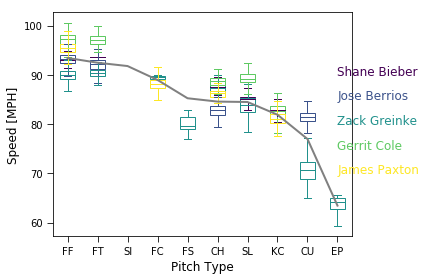

In [141]:
year = '2019'
fig1, ax1 = plt.subplots()


def draw_plot(ax,data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True, showfliers=False,zorder=-10)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color,zorder=-10)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color,zorder=-11)  
        


allpitches = []
for indx in [0,1,2,3,4]:
    plr = check_players[indx]
    for d in np.unique(BPDict[year][plr]['pitch_type'].astype('str')):
        allpitches.append(d)#[d for d in np.unique(BPDict[plr]['pitch_type'].astype('str'))])
    
print(allpitches)
pitches = np.unique(allpitches)
pitches = pitches[pitches!='nan']
print(pitches)

colornum = ['red','blue','green','orange','yellow']
colornum = cm.viridis([0.,0.25,0.5,0.75,1.0])


for indx in [0,1,2,3,4]:
    plr = check_players[indx]
    data = []

    pitches_sorted = np.zeros(pitches.size)
    for ipitch,pitch in enumerate(pitches):
        speeds = np.array(BPDict[year][plr]['release_speed'])
        ptypes = BPDict[year][plr]['pitch_type']
        agreed = np.where(ptypes == pitch)[0]
        pitches_sorted[ipitch] = np.nanmean(speeds[agreed])

pitches = np.array(['FF', 'FT','SI', 'FC','FS', 'CH' , 'SL','KC','CU',  'EP' ])


for indx in [0,1,2,3,4]:
    plr = check_players[indx]
    data = []
    #for pitch in pitches[(-1.*pitches_sorted).argsort()]:
    for pitch in pitches:
        speeds = np.array(BPDict[year][plr]['release_speed'])
        ptypes = BPDict[year][plr]['pitch_type']
        agreed = np.where(ptypes == pitch)[0]
        data.append(speeds[agreed])


    draw_plot(ax1,data, colornum[indx], 'white')
    ax1.text(pitches.size,90-5*indx,plr,color=colornum[indx],size=12)

    
ax1.plot(np.cumsum(np.ones(pitches.size)),totvel/numvel,color='grey')


ax1.set_xticklabels(pitches[(-1.*pitches_sorted).argsort()])
ax1.set_xticklabels(pitches)

ax1.set_ylabel('Speed [MPH]',size=12)
ax1.set_xlabel('Pitch Type',size=12)

plt.tight_layout()
plt.savefig('/Users/mpetersen/Downloads/whiskerexample.png')

['CH' 'CS' 'CU' 'FF' 'SI' 'SL']
FF
FT
SI
FC
CH
SL
FS
KC
CU
EP


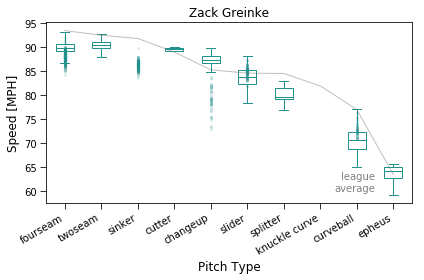

In [149]:

fig1, ax1 = plt.subplots()


colornum = ['red','blue','green','orange','yellow']
colornum = cm.viridis([0.,0.25,0.5,0.75,1.0])


pitches = np.array(['FF', 'FT','SI', 'FC','CH' , 'SL','FS', 'KC','CU',  'EP' ])
pitchesd = np.array(['fourseam', 'twoseam','sinker', 'cutter','changeup' ,\
                    'slider','splitter', 'knuckle curve','curveball',  'epheus' ])


year = '2019'
for indx in [2]:
    plr = check_players[indx]
    data = []
    #for pitch in pitches[(-1.*pitches_sorted).argsort()]:
    for pitch in pitches:
        speeds = np.array(BPDict[year][plr]['release_speed'])
        ptypes = BPDict[year][plr]['pitch_type']
        agreed = np.where(ptypes == pitch)[0]
        data.append(speeds[agreed])


    draw_plot(ax1,data, colornum[indx], 'white')
    #ax1.text(pitches.size,90-1*indx,plr,color=colornum[indx],size=12)

year = '2020'
for indx in [2]:
    plr = check_players[indx]
    print(np.unique(BPDict[year][plr]['pitch_type'].astype('str')))
    data = []
    #for pitch in pitches[(-1.*pitches_sorted).argsort()]:
    for ipitch,pitch in enumerate(pitches):
        print(pitch)
        speeds = np.array(BPDict[year][plr]['release_speed'])
        ptypes = BPDict[year][plr]['pitch_type']
        agreed = np.where(ptypes == pitch)[0]
        #print(ipitch,speeds[agreed])
        #print(ipitch*np.ones(agreed.size))
        ax1.scatter((ipitch+1)*np.ones(agreed.size),speeds[agreed],color=colornum[indx],s=5.,alpha=0.1)


    #draw_plot(ax1,data, colornum[indx], 'white')
    #ax1.text(pitches.size,90-5*indx,plr,color=colornum[indx],size=12)

       
ax1.plot(np.cumsum(np.ones(pitches.size)),totvel/numvel,color='grey',lw=1.,alpha=0.5)
ax1.text(9.5,60.,'league\naverage',size=10,color='grey',ha='right')

ax1.set_title('Zack Greinke',size=12)
ax1.set_xticklabels(pitchesd,rotation=30,ha='right')

ax1.set_ylabel('Speed [MPH]',size=12)
ax1.set_xlabel('Pitch Type',size=12)

plt.tight_layout()
plt.savefig('/Users/mpetersen/Downloads/Greinke_whiskerexample.png')

['2019-03-29' '2019-04-03' '2019-04-09' '2019-04-14' '2019-04-20'
 '2019-04-27' '2019-05-02' '2019-05-08' '2019-05-14' '2019-05-19'
 '2019-05-25' '2019-05-30' '2019-06-05' '2019-06-10' '2019-06-15'
 '2019-06-20' '2019-06-26' '2019-07-02' '2019-07-07' '2019-07-13'
 '2019-07-18' '2019-07-24' '2019-07-30' '2019-08-05' '2019-08-10'
 '2019-08-16' '2019-08-21' '2019-08-27' '2019-09-01' '2019-09-07'
 '2019-09-13' '2019-09-20' '2019-09-25']


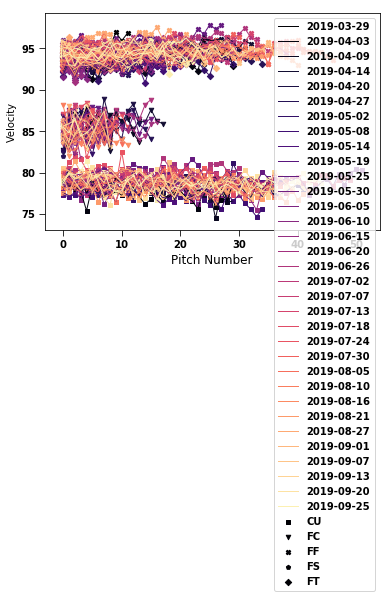

In [27]:
starts = np.unique(BPDict[plr]['game_date'])
pitches = np.unique(BPDict[plr]['pitch_type'].astype('str'))
pitches = pitches[pitches!='nan']

markers = ['s','v','X','p','D','o']
print(starts)

for istart,start in enumerate(starts):
    which_pitches = np.where(BPDict[plr]['game_date']==start)[0]
    for ipitch,pitch in enumerate(pitches):
        speeds = np.array(BPDict[plr]['release_speed'][which_pitches])
        ptypes = BPDict[plr]['pitch_type'][which_pitches]
        agreed = np.where(ptypes == pitch)[0]
        if ipitch==0:
            plt.plot(np.arange(0,agreed.size,1),speeds[agreed],lw=1.0,color=cm.magma(istart/len(starts),1.),label=start)
        else:
            plt.plot(np.arange(0,agreed.size,1),speeds[agreed],lw=1.0,color=cm.magma(istart/len(starts),1.))


        if istart==0:
            plt.scatter(np.arange(0,agreed.size,1),speeds[agreed],marker=markers[ipitch],s=20.,color=cm.magma(istart/len(starts),1.),label=pitch)
        else:
            plt.scatter(np.arange(0,agreed.size,1),speeds[agreed],marker=markers[ipitch],s=20.,color=cm.magma(istart/len(starts),1.))



plt.legend()
plt.xlabel('Pitch Number',size=12)
plt.ylabel('Velocity')
plt.tight_layout()

plt.savefig('figures/'+plr.replace(" ","")+year+'.png',dpi=300)




[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
['2019-03-29' '2019-04-03' '2019-04-09' '2019-04-14' '2019-04-20'
 '2019-04-27' '2019-05-02' '2019-05-08' '2019-05-14' '2019-05-19'
 '2019-05-25' '2019-05-30' '2019-06-05' '2019-06-10' '2019-06-15'
 '2019-06-20' '2019-06-26' '2019-07-02' '2019-07-07' '2019-07-13'
 '2019-07-18' '2019-07-24' '2019-07-30' '2019-08-05' '2019-08-10'
 '2019-08-16' '2019-08-21' '2019-08-27' '2019-09-01' '2019-09-07'
 '2019-09-13' '2019-09-20' '2019-09-25']


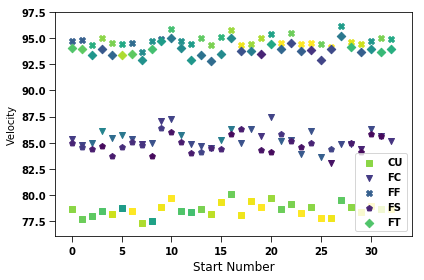

In [28]:
starts = np.unique(BPDict[plr]['game_date'])
pitches = np.unique(BPDict[plr]['pitch_type'].astype('str'))
pitches = pitches[pitches!='nan']
datecode = np.arange(0,starts.size,1)
print(datecode)

# color the start by number of pitches

markers = ['s','v','X','p','D','o']
print(starts)

for istart,start in enumerate(starts):
    which_pitches = np.where(BPDict[plr]['game_date']==start)[0]
    for ipitch,pitch in enumerate(pitches):
        speeds = np.array(BPDict[plr]['release_speed'][which_pitches])
        ptypes = BPDict[plr]['pitch_type'][which_pitches]
        agreed = np.where(ptypes == pitch)[0]
        # bin 'em up
        if istart==0:
            plt.scatter(datecode[istart],np.nanmedian(speeds[agreed]),\
                    color=cm.viridis(agreed.size/40.,1.),\
                   marker=markers[ipitch],label=pitch)
        else:
            plt.scatter(datecode[istart],np.nanmedian(speeds[agreed]),\
                    color=cm.viridis(agreed.size/40.,1.),\
                   marker=markers[ipitch])
        


plt.legend()
plt.xlabel('Start Number',size=12)
plt.ylabel('Velocity')
plt.tight_layout()

plt.savefig('figures/'+plr.replace(" ","")+year+'.png',dpi=300)





In [78]:
list(np.arange(0,101,5))

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100]

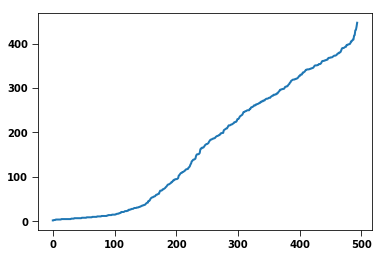

In [57]:
#print(dvals.values)
plt.plot(dvals[dvals.argsort()])

552
['double' 'double_play' 'field_error' 'field_out' 'fielders_choice'
 'fielders_choice_out' 'force_out' 'grounded_into_double_play' 'home_run'
 'sac_fly' 'single' 'triple']


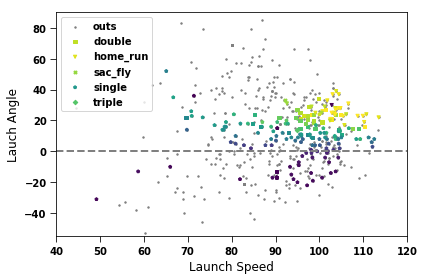

In [72]:

# check the outcomes

w = np.where(np.isfinite(BPDict[plr]['launch_speed']))[0]
print(w.size)

#print(BPDict[plr]['events'][w])

outcomes = np.unique(BPDict[plr]['events'][w])
print(outcomes)

dvals = np.array(BPDict[plr]['hit_distance_sc'].values)

markers = ['s','v','X','p','D','o','^','P','*']

plt.scatter(BPDict[plr]['launch_speed'][w],\
                BPDict[plr]['launch_angle'][w],\
                color='grey',s=2.,marker='o',label='outs')

# only allow these unique outcomes
outcomes = ['double', 'home_run', 'sac_fly', 'single', 'triple']

for indx,outcome in enumerate(outcomes):
    v = np.where(BPDict[plr]['events'].values==outcome)[0]
    #print(v)
    #print(BPDict[plr]['events'][v].values)
    #print(outcome,v)
    try:
        plt.scatter(BPDict[plr]['launch_speed'][w][v],\
                BPDict[plr]['launch_angle'][w][v],\
                color=cm.viridis(dvals[v]/400.,1.),s=10.,marker=markers[indx],label=outcome)
    except:
        pass

plt.legend()
plt.plot([40.,120.],[0,0],color='grey',linestyle='dashed')

plt.axis([40.,120.,-55,90])
plt.ylabel('Lauch Angle',size=12)
plt.xlabel('Launch Speed',size=12)

plt.tight_layout()

plt.savefig('figures/'+plr.replace(" ","")+'_launch.png',dpi=300)




['CH' 'FC' 'FF' 'KC' 'SL']


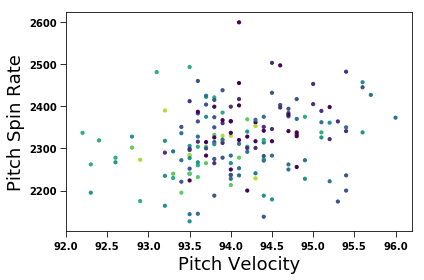

In [19]:

# check a particular pitch

print(np.unique(BPDict[plr]['pitch_type']))
pitchtype = 'FF'

pitch_velocity = BPDict[plr]['release_speed'][BPDict[plr]['pitch_type']==pitchtype]
pitch_spin = BPDict[plr]['release_spin_rate'][BPDict[plr]['pitch_type']==pitchtype]
pitch_inning = np.array(BPDict[plr]['inning'][BPDict[plr]['pitch_type']==pitchtype]).astype('float')


plt.scatter(pitch_velocity,pitch_spin,color=cm.viridis((pitch_inning-1)/8.,1.),s=10.)

plt.xlabel('Pitch Velocity',size=18)
plt.ylabel('Pitch Spin Rate',size=18)
plt.tight_layout()

